## COURSERA FINAL PROJECT WEEK 4 & 5 CAPSTONE

## Week 4

1 ) A description of the problem and a discussion of the background.
2 ) A description of the data and how it will be used to solve the problem.

My problem is looking at where baseball is explanding.  This information can be very valuable to a business to see where geographically its product it growing in interest.  For me, I love baseball and am interested in where the game is growing in popularity, and where it is not.  This type of information can be used for marketing, creating new teams in new markets, or for creating non-profit foundations to increase the number of people who play the game.

My project will look at the growth of baseball based on location.  Initially the data will be imported from the website "baseball almanac".  This data will contain information on the location of the place of birth or all Major League Baseball players from 1876 to present.  The birth places data will be imported and cleaned.  Once evaluated this data will be used to glean initial reflections on where baseball is growing.  Based on these reflections I will take a few locations to query foursquare and look at the amount of foursquare traffic related to baseball in a given area.

## Week 5 below

In [98]:
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
import numpy as np
import re
import xlrd
import math
import requests
import lxml.html as lh

import geopy
from geopy.geocoders import Nominatim
import requests
import random
import itertools
import folium
import json
import mpl_toolkits
from folium import plugins
import matplotlib.pylab as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.image as mpimg
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import urllib
from bs4 import BeautifulSoup
import ssl

from IPython.display import Image
from IPython.core.display import HTML
from pandas.io.json import json_normalize

import pylab as pl
from pylab import rcParams
import pydotplus
import numba
import pickle
import scipy as sp
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster
from scipy.spatial import distance_matrix
from scipy.optimize import curve_fit
from scipy import optimize as opt
import seaborn as sns

import statsmodels as sm
import wget


import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interactive
from ipywidgets import fixed
from ipywidgets import interact_manual


import sklearn as sk
import sklearn.utils
from sklearn import manifold
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.externals.six import StringIO

In [7]:
# Define data structures and counting iterables
year = 1876
dataframes = []
urls = ['http://www.baseball-almanac.com/players/birthplace.php?y=' + str(year)]

In [ ]:
# retrieve data from baseball almanac from years 1876 to 2019.  
# Save data to CSV.  Clean data to retrieve correct table from the website and place proper data into columns.
while year < 2020 :
    url = i
    html = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(html)
    table = soup.find_all('table')[6] 
    df = pd.read_html(str(table))
    df = df[0]
    pattern = '(?P<Country>[\w\s\.\,]*)\s+\((?P<value>\d+)\)'
    df = (df.stack()
          .str.extract(pattern, expand=True)
          .dropna()
          .drop_duplicates()
         )
    df = df.T
    df.to_csv('your_array.csv', header=False, index=False)
    df = pd.read_csv('your_array.csv', header=None)
    df.columns = df.iloc[0]
    df.drop(df.index[0] , inplace = True)
    df.insert(0, 'Year', year)
    df.to_csv(str(year) + '.csv')
    year = int(year) + 1

In [67]:
# read saved csv's into one data frame for analysis
year = 1876
while year < 2020 :
    f = (str(year) + '.csv')
    dataframes.append(pd.read_csv(f))
    year += 1
df = pd.concat(dataframes , sort = False)

In [68]:
# fill NaN cells with zero value and drop unneeded column
df = df.fillna(0)
del df['Unnamed: 0']

In [69]:
# Rename Columns that need it
df = df.rename(columns = {'United States':'United_States'})
df = df.rename(columns = {'Rhode Island':'Rhode_Island'})
df = df.rename(columns = {'South Carolina':'South_Carolina'})
df = df.rename(columns = {'South Dakota':'South_Dakota'})
df = df.rename(columns = {'New Hampshire':'New_Hampshire'})
df = df.rename(columns = {'New Jersey':'New_Jersey'})
df = df.rename(columns = {'New Mexico':'New_Mexico'})
df = df.rename(columns = {'Washington, D.C.':'Washington_DC'})
df = df.rename(columns = {'New York':'New_York'})
df = df.rename(columns = {'West Virginia':'West_Virginia'})
df = df.rename(columns = {'North Carolina':'North_Carolina'})
df = df.rename(columns = {'North Dakota':'North_Dakota'})
df = df.rename(columns = {'Canary Islands':'Canary_Islands'})
df = df.rename(columns = {'Atlantic Ocean':'Atlantic_Ocean'})
df = df.rename(columns = {'Puerto Rico':'Puerto_Rico'})
df = df.rename(columns = {'Dominican Republic':'Dominican_Republic'})
df = df.rename(columns = {'Panama Canal Zone':'Panama_Canal_Zone'})
df = df.rename(columns = {'Virgin Islands':'Virgin_Islands'})
df = df.rename(columns = {'American Samoa':'American_Samoa'})
df = df.rename(columns = {'West Germany':'West_Germany'})
df = df.rename(columns = {'British Honduras':'British_Honduras'})
df = df.rename(columns = {'South Korea':'South_Korea'})
df = df.rename(columns = {'South Vietnam':'South_Vietnam'})
df = df.rename(columns = {'Saudi Arabia':'Saudi_Arabia'})
df = df.rename(columns = {'South Africa':'South_Africa'})
df = df.rename(columns = {'Northern Ireland':'Northern_Ireland'})

In [70]:
# Create summary columns to summaries data by region
Europe = []
for index, row in df.iterrows():
    Europe.append(row.Germany + row.England + row.Ireland + row.Scotland + row.Czechoslovakia + row.Wales + row.Sweden + row.Netherlands + row.Norway + row.France + row.Russia + row.Switzerland + row.Hungary + row.Denmark + row.Finland + row.Poland + row.Italy + row.Greece + row.Austria + row.Spain + row.West_Germany + row.Northern_Ireland + row.Belgium + row.Lithuania)

df['Europe'] = Europe

Latin_America = []
for index, row in df.iterrows():
    Latin_America.append(row.Cuba + row.Colombia + row.Venezuela + row.Panama + row.Puerto_Rico + row.Dominican_Republic + row.Bahamas + row.Virgin_Islands + row.Nicaragua + row.Honduras + row.Curacao + row.British_Honduras + row.Aruba + row.Brazil + row.Jamaica + row.Mexico + row.Panama_Canal_Zone)
    
df['Latin_America'] = Latin_America

Asia = []
for index, row in df.iterrows():
    Asia.append(row.Indonesia + row.China + row.Guam + row.Taiwan + row.Philippines + row.South_Vietnam + row.Singapore + row.South_Korea + row.American_Samoa + row.Japan)
    
df['Asia'] = Asia

Africa = []
for index, row in df.iterrows():
    Africa.append(row.Canary_Islands + row.South_Africa)
    
df['Africa'] = Africa   

Middle_East = []
for index, row in df.iterrows():
    Middle_East.append(row.Saudi_Arabia + row.Afghanistan)
    
df['Middle_East'] = Middle_East  

In [71]:
# rearrange the column order.  Summary columns then alphabetical by region.
df = df[['Year', 'United_States', 'Europe', 'Latin_America' , 'Asia' , 'Africa' , 'Middle_East' , 'Alabama' , 'Alaska' , 'Arizona' , 'Arkansas' , 'California' , 'Colorado' , 'Connecticut' , 'Delaware' , 'Florida' , 'Georgia' , 'Hawaii' , 'Idaho' , 'Illinois' , 'Indiana' , 'Iowa' , 'Kansas' , 'Kentucky' , 'Louisiana' , 'Maine' , 'Maryland' , 'Massachusetts' , 'Michigan' , 'Minnesota' , 'Mississippi' , 'Missouri' , 'Montana' , 'Nebraska' , 'Nevada' , 'New_Hampshire' , 'New_Jersey' , 'New_Mexico' , 'New_York' , 'North_Carolina' , 'North_Dakota' , 'Ohio' , 'Oklahoma' , 'Oregon' , 'Pennsylvania' , 'Rhode_Island' , 'South_Carolina' , 'South_Dakota' , 'Tennessee' , 'Texas' , 'Utah' , 'Vermont' , 'Virginia' , 'Washington' , 'Washington_DC' , 'West_Virginia' , 'Wisconsin' , 'Wyoming' , 'Australia' , 'Austria' , 'Belgium' , 'Canada', 'Czechoslovakia' ,'Denmark' , 'England' , 'Finland' , 'France' , 'Germany' , 'Greece' ,'Hungary' , 'Ireland' , 'Italy' , 'Lithuania' , 'Netherlands' , 'Northern_Ireland' , 'Norway' , 'Poland' , 'Russia' , 'Scotland' , 'Spain' , 'Sweden' , 'Switzerland' , 'Unknown' , 'Wales' , 'West_Germany' , 'Atlantic_Ocean' , 'Aruba' , 'Bahamas' , 'Brazil' , 'British_Honduras' , 'Colombia' , 'Cuba' , 'Curacao' , 'Dominican_Republic' , 'Honduras' , 'Jamaica' , 'Mexico' , 'Nicaragua' , 'Panama' , 'Panama_Canal_Zone' , 'Puerto_Rico' , 'Venezuela' , 'Virgin_Islands' , 'American_Samoa' , 'China' , 'Guam' , 'Japan' , 'Indonesia' , 'Philippines' , 'Singapore' , 'South_Korea' , 'South_Vietnam' , 'Taiwan' , 'Afghanistan' , 'Canary_Islands' , 'Saudi_Arabia' , 'South_Africa']]

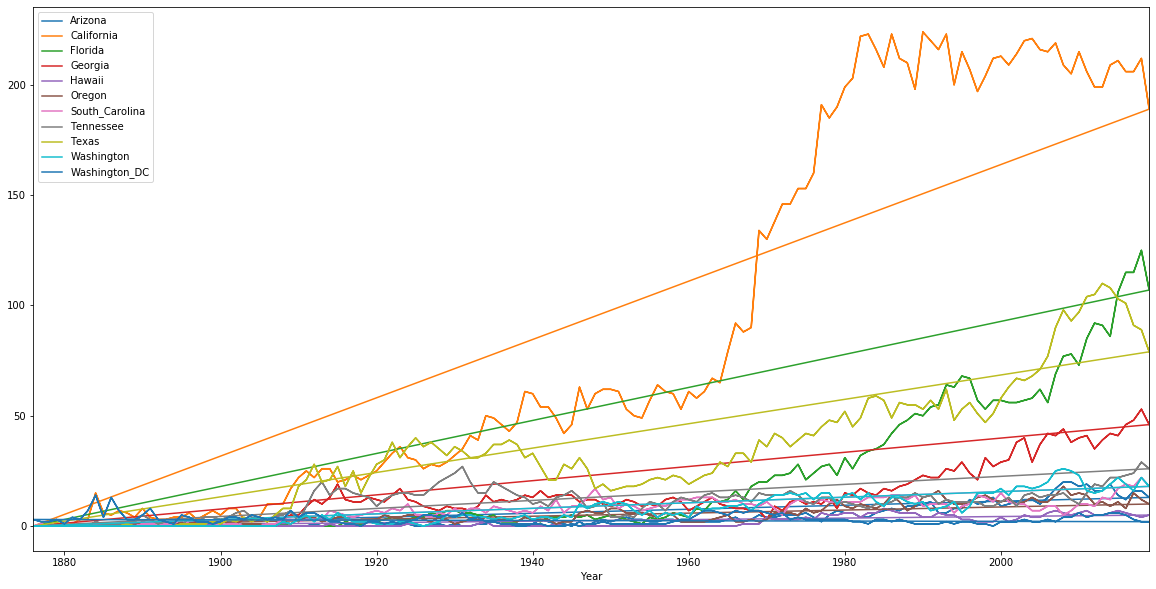

In [57]:

df.plot(y=[ 'Arizona' , 'California' , 'Florida' , 'Georgia' , 'Hawaii' , 'Oregon' , 'South_Carolina' , 'Tennessee' , 'Texas'  , 'Washington' , 'Washington_DC'] , figsize=(20,10) , x = ['Year'])

## Results

Results from the aggregate data show a marked increase in baseball internationally in Latin America and Asia.  In the United State baseball has marked increase in California, Florida, Georgia, and Texas over the last 50 years.

Now lets use models to understand the data more completely.

## Regression Model

In [58]:
#fitting lines to different locations

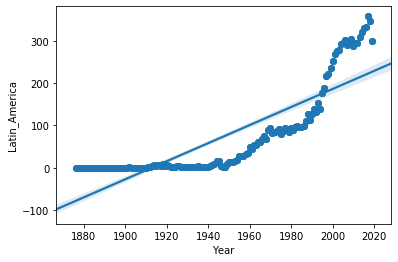

In [75]:
sns.regplot(data = df.reset_index(), y = 'Latin_America', x = 'Year')

In [76]:
# fitting data for Latin American grow

In [77]:
X = df[['Year']]
Y = df['Latin_America']

In [78]:
lm1 = sk.linear_model.LinearRegression()

In [79]:
lm1.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
Yhat = lm1.predict(X)

In [83]:
print(lm1.intercept_)
print(lm1.coef_)

-4079.547875974602
[2.13288723]


In [ ]:
# Using polyfit

In [86]:
x = df['Year']
y = df['Latin_America']

f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

           3         2
0.0002506 x - 1.431 x + 2723 x - 1.727e+06


In [90]:
def PlotPolly(model, independent_variable, dependent_variable, name) :
    x_new = np.linspace(1980 , 2000 , 2200)
    y_new = model(x_new)
    
    plt.plot(independent_variable , dependent_variable , '.' , x_new , y_new , '-')
    plt.title('Polynomial Fit with Matplotlib for Latin_American_Ball_Players ~ Year')
    ax = plt.gca()
    ax.set_facecolor((0.898 , 0.898 , 0.898))
    fig = plt.gcf()
    plt.xlabel(name)
    plt.ylabel('Ball Players')
    
    plt.show()
    plt.close()

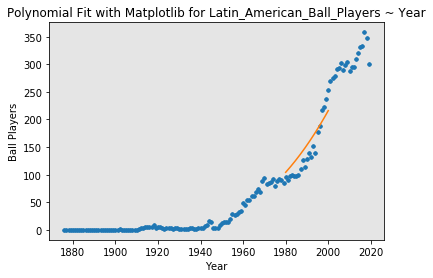

In [91]:
PlotPolly(p , x , y , 'Year')

In [92]:
df.describe()

,Year,United_States,Europe,Latin_America,Asia,Africa,Middle_East,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New_Hampshire,New_Jersey,New_Mexico,New_York,North_Carolina,North_Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode_Island,South_Carolina,South_Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,Washington_DC,West_Virginia,Wisconsin,Wyoming,Australia,Austria,Belgium,Canada,Czechoslovakia,Denmark,England,Finland,France,Germany,Greece,Hungary,Ireland,Italy,Lithuania,Netherlands,Northern_Ireland,Norway,Poland,Russia,Scotland,Spain,Sweden,Switzerland,Unknown,Wales,West_Germany,Atlantic_Ocean,Aruba,Bahamas,Brazil,British_Honduras,Colombia,Cuba,Curacao,Dominican_Republic,Honduras,Jamaica,Mexico,Nicaragua,Panama,Panama_Canal_Zone,Puerto_Rico,Venezuela,Virgin_Islands,American_Samoa,China,Guam,Japan,Indonesia,Philippines,Singapore,South_Korea,South_Vietnam,Taiwan,Afghanistan,Canary_Islands,Saudi_Arabia,South_Africa
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.00000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.00000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,1947.500000,591.777778,5.944444,74.250000,3.347222,0.027778,0.090278,13.187500,0.486111,4.069444,5.902778,90.736111,3.368056,6.770833,1.756944,21.645833,13.937500,1.729167,1.243056,35.395833,12.958333,7.784722,7.250000,9.784722,9.722222,2.097222,9.229167,18.847222,16.138889,5.715278,7.402778,20.305556,0.687500,4.409722,1.465278,1.805556,14.208333,1.000000,38.493056,15.229167,0.590278,34.993056,10.180556,5.298611,43.486111,2.861111,7.506944,1.402778,10.847222,33.986111,1.194444,1.305556,10.25000,7.340278,3.090278,4.173611,7.840278,0.666667,1.027778,0.013889,0.034722,7.361111,0.152778,0.048611,0.805556,0.006944,0.201389,0.750000,0.006944,0.194444,1.368056,0.180556,0.020833,0.409722,0.006944,0.194444,0.145833,0.194444,0.326389,0.055556,0.069444,0.069444,0.229167,0.173611,0.513889,0.006944,0.222222,0.159722,0.138889,0.020833,0.75000,7.687500,0.638889,27.868056,0.062500,0.326389,4.951389,0.687500,2.402778,0.159722,12.659722,14.868056,0.645833,0.048611,0.034722,0.020833,1.972222,0.020833,0.034722,0.027778,0.708333,0.076389,0.402778,0.020833,0.006944,0.069444,0.020833
std,41.616412,239.015336,4.315479,104.994564,7.503428,0.164526,0.286912,8.777187,1.007992,5.282708,3.942133,84.095487,2.960874,3.071579,1.351702,30.338569,12.502929,2.401330,1.441415,13.555361,6.743778,4.058442,4.329524,4.229764,7.499832,1.939883,3.305172,9.016859,10.830873,4.000574,5.394402,7.292635,0.954672,3.245014,3.231041,1.175609,5.576561,1.297865,11.732516,10.082066,0.901763,13.908299,7.453478,4.571291,17.493248,1.826377,4.935778,1.553319,6.331140,27.936202,1.446387,1.455979,5.87041,6.7

## In Conlusion

Latin America is the fastest growing segment in the baseball data.  Asia is growing segement as well.  Baseball could invest in those locations

In [ ]:
urls = ['http://www.baseball-almanac.com/players/birthplace.php?y=1876',
'http://www.baseball-almanac.com/players/birthplace.php?y=1877',
'http://www.baseball-almanac.com/players/birthplace.php?y=1878',
'http://www.baseball-almanac.com/players/birthplace.php?y=1879',
'http://www.baseball-almanac.com/players/birthplace.php?y=1880',
'http://www.baseball-almanac.com/players/birthplace.php?y=1881',
'http://www.baseball-almanac.com/players/birthplace.php?y=1882',
'http://www.baseball-almanac.com/players/birthplace.php?y=1883',
'http://www.baseball-almanac.com/players/birthplace.php?y=1884',
'http://www.baseball-almanac.com/players/birthplace.php?y=1885',
'http://www.baseball-almanac.com/players/birthplace.php?y=1886',
'http://www.baseball-almanac.com/players/birthplace.php?y=1887',
'http://www.baseball-almanac.com/players/birthplace.php?y=1888',
'http://www.baseball-almanac.com/players/birthplace.php?y=1889',
'http://www.baseball-almanac.com/players/birthplace.php?y=1890',
'http://www.baseball-almanac.com/players/birthplace.php?y=1891',
'http://www.baseball-almanac.com/players/birthplace.php?y=1892',
'http://www.baseball-almanac.com/players/birthplace.php?y=1893',
'http://www.baseball-almanac.com/players/birthplace.php?y=1894',
'http://www.baseball-almanac.com/players/birthplace.php?y=1895',
'http://www.baseball-almanac.com/players/birthplace.php?y=1896',
'http://www.baseball-almanac.com/players/birthplace.php?y=1897',
'http://www.baseball-almanac.com/players/birthplace.php?y=1898',
'http://www.baseball-almanac.com/players/birthplace.php?y=1899',
'http://www.baseball-almanac.com/players/birthplace.php?y=1900',
'http://www.baseball-almanac.com/players/birthplace.php?y=1901',
'http://www.baseball-almanac.com/players/birthplace.php?y=1902',
'http://www.baseball-almanac.com/players/birthplace.php?y=1903',
'http://www.baseball-almanac.com/players/birthplace.php?y=1904',
'http://www.baseball-almanac.com/players/birthplace.php?y=1905',
'http://www.baseball-almanac.com/players/birthplace.php?y=1906',
'http://www.baseball-almanac.com/players/birthplace.php?y=1907',
'http://www.baseball-almanac.com/players/birthplace.php?y=1908',
'http://www.baseball-almanac.com/players/birthplace.php?y=1909',
'http://www.baseball-almanac.com/players/birthplace.php?y=1910',
'http://www.baseball-almanac.com/players/birthplace.php?y=1911',
'http://www.baseball-almanac.com/players/birthplace.php?y=1912',
'http://www.baseball-almanac.com/players/birthplace.php?y=1913',
'http://www.baseball-almanac.com/players/birthplace.php?y=1914',
'http://www.baseball-almanac.com/players/birthplace.php?y=1915',
'http://www.baseball-almanac.com/players/birthplace.php?y=1916',
'http://www.baseball-almanac.com/players/birthplace.php?y=1917',
'http://www.baseball-almanac.com/players/birthplace.php?y=1918',
'http://www.baseball-almanac.com/players/birthplace.php?y=1919',
'http://www.baseball-almanac.com/players/birthplace.php?y=1920',
'http://www.baseball-almanac.com/players/birthplace.php?y=1921',
'http://www.baseball-almanac.com/players/birthplace.php?y=1922',
'http://www.baseball-almanac.com/players/birthplace.php?y=1923',
'http://www.baseball-almanac.com/players/birthplace.php?y=1924',
'http://www.baseball-almanac.com/players/birthplace.php?y=1925',
'http://www.baseball-almanac.com/players/birthplace.php?y=1926',
'http://www.baseball-almanac.com/players/birthplace.php?y=1927',
'http://www.baseball-almanac.com/players/birthplace.php?y=1928',
'http://www.baseball-almanac.com/players/birthplace.php?y=1929',
'http://www.baseball-almanac.com/players/birthplace.php?y=1930',
'http://www.baseball-almanac.com/players/birthplace.php?y=1931',
'http://www.baseball-almanac.com/players/birthplace.php?y=1932',
'http://www.baseball-almanac.com/players/birthplace.php?y=1933',
'http://www.baseball-almanac.com/players/birthplace.php?y=1934',
'http://www.baseball-almanac.com/players/birthplace.php?y=1935',
'http://www.baseball-almanac.com/players/birthplace.php?y=1936',
'http://www.baseball-almanac.com/players/birthplace.php?y=1937',
'http://www.baseball-almanac.com/players/birthplace.php?y=1938',
'http://www.baseball-almanac.com/players/birthplace.php?y=1939',
'http://www.baseball-almanac.com/players/birthplace.php?y=1940',
'http://www.baseball-almanac.com/players/birthplace.php?y=1941',
'http://www.baseball-almanac.com/players/birthplace.php?y=1942',
'http://www.baseball-almanac.com/players/birthplace.php?y=1943',
'http://www.baseball-almanac.com/players/birthplace.php?y=1944',
'http://www.baseball-almanac.com/players/birthplace.php?y=1945',
'http://www.baseball-almanac.com/players/birthplace.php?y=1946',
'http://www.baseball-almanac.com/players/birthplace.php?y=1947',
'http://www.baseball-almanac.com/players/birthplace.php?y=1948',
'http://www.baseball-almanac.com/players/birthplace.php?y=1949',
'http://www.baseball-almanac.com/players/birthplace.php?y=1950',
'http://www.baseball-almanac.com/players/birthplace.php?y=1951',
'http://www.baseball-almanac.com/players/birthplace.php?y=1952',
'http://www.baseball-almanac.com/players/birthplace.php?y=1953',
'http://www.baseball-almanac.com/players/birthplace.php?y=1954',
'http://www.baseball-almanac.com/players/birthplace.php?y=1955',
'http://www.baseball-almanac.com/players/birthplace.php?y=1956',
'http://www.baseball-almanac.com/players/birthplace.php?y=1957',
'http://www.baseball-almanac.com/players/birthplace.php?y=1958',
'http://www.baseball-almanac.com/players/birthplace.php?y=1959',
'http://www.baseball-almanac.com/players/birthplace.php?y=1960',
'http://www.baseball-almanac.com/players/birthplace.php?y=1961',
'http://www.baseball-almanac.com/players/birthplace.php?y=1962',
'http://www.baseball-almanac.com/players/birthplace.php?y=1963',
'http://www.baseball-almanac.com/players/birthplace.php?y=1964',
'http://www.baseball-almanac.com/players/birthplace.php?y=1965',
'http://www.baseball-almanac.com/players/birthplace.php?y=1966',
'http://www.baseball-almanac.com/players/birthplace.php?y=1967',
'http://www.baseball-almanac.com/players/birthplace.php?y=1968',
'http://www.baseball-almanac.com/players/birthplace.php?y=1969',
'http://www.baseball-almanac.com/players/birthplace.php?y=1970',
'http://www.baseball-almanac.com/players/birthplace.php?y=1971',
'http://www.baseball-almanac.com/players/birthplace.php?y=1972',
'http://www.baseball-almanac.com/players/birthplace.php?y=1973',
'http://www.baseball-almanac.com/players/birthplace.php?y=1974',
'http://www.baseball-almanac.com/players/birthplace.php?y=1975',
'http://www.baseball-almanac.com/players/birthplace.php?y=1976',
'http://www.baseball-almanac.com/players/birthplace.php?y=1977',
'http://www.baseball-almanac.com/players/birthplace.php?y=1978',
'http://www.baseball-almanac.com/players/birthplace.php?y=1979',
'http://www.baseball-almanac.com/players/birthplace.php?y=1980',
'http://www.baseball-almanac.com/players/birthplace.php?y=1981',
'http://www.baseball-almanac.com/players/birthplace.php?y=1982',
'http://www.baseball-almanac.com/players/birthplace.php?y=1983',
'http://www.baseball-almanac.com/players/birthplace.php?y=1984',
'http://www.baseball-almanac.com/players/birthplace.php?y=1985',
'http://www.baseball-almanac.com/players/birthplace.php?y=1986',
'http://www.baseball-almanac.com/players/birthplace.php?y=1987',
'http://www.baseball-almanac.com/players/birthplace.php?y=1988',
'http://www.baseball-almanac.com/players/birthplace.php?y=1989',
'http://www.baseball-almanac.com/players/birthplace.php?y=1990',
'http://www.baseball-almanac.com/players/birthplace.php?y=1991',
'http://www.baseball-almanac.com/players/birthplace.php?y=1992',
'http://www.baseball-almanac.com/players/birthplace.php?y=1993',
'http://www.baseball-almanac.com/players/birthplace.php?y=1994',
'http://www.baseball-almanac.com/players/birthplace.php?y=1995',
'http://www.baseball-almanac.com/players/birthplace.php?y=1996',
'http://www.baseball-almanac.com/players/birthplace.php?y=1997',
'http://www.baseball-almanac.com/players/birthplace.php?y=1998',
'http://www.baseball-almanac.com/players/birthplace.php?y=1999',
'http://www.baseball-almanac.com/players/birthplace.php?y=2000',
'http://www.baseball-almanac.com/players/birthplace.php?y=2001',
'http://www.baseball-almanac.com/players/birthplace.php?y=2002',
'http://www.baseball-almanac.com/players/birthplace.php?y=2003',
'http://www.baseball-almanac.com/players/birthplace.php?y=2004',
'http://www.baseball-almanac.com/players/birthplace.php?y=2005',
'http://www.baseball-almanac.com/players/birthplace.php?y=2006',
'http://www.baseball-almanac.com/players/birthplace.php?y=2007',
'http://www.baseball-almanac.com/players/birthplace.php?y=2008',
'http://www.baseball-almanac.com/players/birthplace.php?y=2009',
'http://www.baseball-almanac.com/players/birthplace.php?y=2010',
'http://www.baseball-almanac.com/players/birthplace.php?y=2011',
'http://www.baseball-almanac.com/players/birthplace.php?y=2012',
'http://www.baseball-almanac.com/players/birthplace.php?y=2013',
'http://www.baseball-almanac.com/players/birthplace.php?y=2014',
'http://www.baseball-almanac.com/players/birthplace.php?y=2015',
'http://www.baseball-almanac.com/players/birthplace.php?y=2016',
'http://www.baseball-almanac.com/players/birthplace.php?y=2017',
'http://www.baseball-almanac.com/players/birthplace.php?y=2018',
'http://www.baseball-almanac.com/players/birthplace.php?y=2019']